## 6.

Calcular el campo de velocidades cerca de la superficie de un cilindro de radio R = 2 cm.


In [8]:
from numpy import sin,pi,linspace
from pylab import plot,show,subplot,axis
import matplotlib.pyplot as plt
import numpy as np

a) Definir una discretizacióon en los ejes x e y, donde la región es: A ∈ [−4, 4] con 25
puntos en cada eje.

b) Definir la función potencial del flujo dada por:
φ(x, y) = V x(1 −R^2/x^2+y^2)

c) Calcule y guarde adecuadamente el campo de velocidades usando la definición de derivada parcial central

In [16]:
n = 25
x = np.linspace(-4,4,n )
y = np.linspace(-4,4,n )
h = 0.001
r = 2
v = 2
def potencial(x,y): 
    p = v*x*(1-((r**2)/(x**2 + y**2)))
    return  p
    
def derivadaCx(x, f, h, y):
    d = (f(x+h, y)-f(x-h, y))/(2*h)
    return d

def derivadaCy(x, f, h, y):
    d = -(f(x, y+h)-f(x, y-h))/(2*h)
    return d



d) Dibuje el campo de velocidades usando el método: ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j])

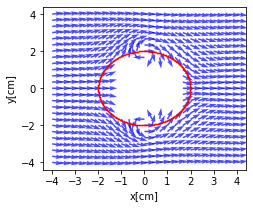

In [39]:
def Circulo(radio=2):
    s = np.zeros((radio,2))
    s[0] = [0.05,0.1]
    s[1] = [0.05,-0.1]    
    for i in range(radio):
        n= 2*np.pi*i/radio
        s[i] = [2*np.cos(n), 2*np.sin(n)]     
    return s
s = Circulo(1000)
def campo(x,y):
    campo_x = derivadaCx(x,potencial,h,y)
    campo_y = derivadaCy(x,potencial,h,y)        
    return campo_x,campo_y
u = 1.6
def GetField(x,y):    
    Ex = np.zeros((n,n))
    Ey = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if x[i]<=-u or x[i] >=  u or y[j]<=-u or y[j]>=u:
                Ex[i,j],Ey[i,j] = campo(x[i],y[j])         
    return Ex,Ey
Ex,Ey = GetField(x,y)
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1)
ax.set_xticks(range(-4, 5))
for i in range(n):
    for j in range(n):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j],color='blue',alpha=0.7)
plt.xlabel('x[cm]',) 
plt.ylabel('y[cm]',)
ax.scatter(s[:,0],s[:,1],color='r',s=0.1)